<a href="https://colab.research.google.com/github/Yashwanth-23/Pneumonia-detection-using-CNN/blob/main/Pneumonia_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Pneumonia detection using Convolutional neural networks</h1>

<h1>Objective :</h1>
<p>Pneumonia infection is a serious disease of the lungs with a range of possible causes. Bacteria, viruses or fungi can cause Pneumonia infection. Pneumonia is ranked as eighth leading for causing more no. of deaths in the US, It causes death in children younger than five years of age worldwide. To save precious lives many people humans and technology should interact.<p>

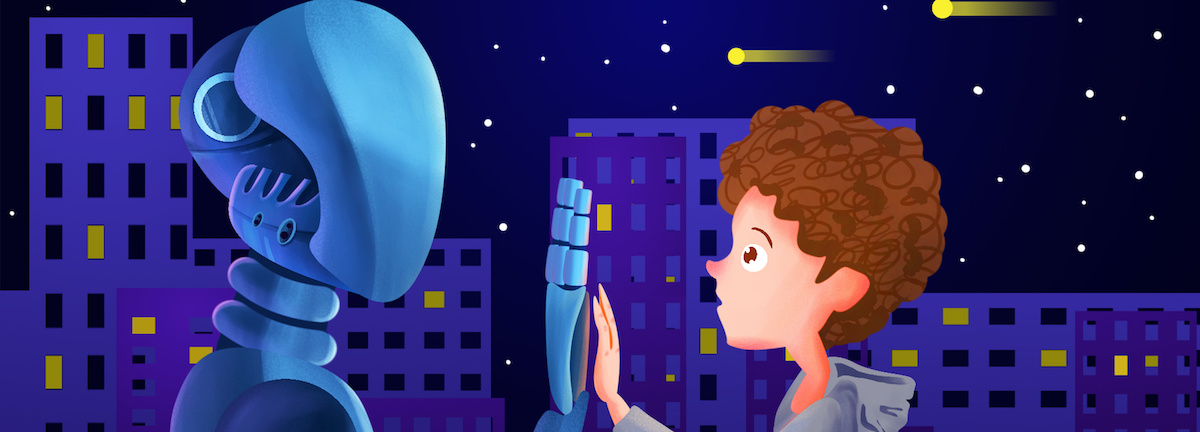


Chest X-rays are used for detecting the Pneumonia infection and to locate the infected area in the lungs.
So, To detect the the pneumonia radiologist have to observe the chest xray and he/she has to update the doctor correctly.
The main objective of this model is to identify if the person has Pneumonia or not with high accuracy so that the person can get treatment as soon as possible. Deep Learning models which are trained correctly by using good datasets can be helpful for doctors.
To train the model for detecting whether the person has pneumonia or not, A Convolutional Neural Network(CNN) is used. The CNN can train the images of chest xrays and then it can predict with high accuracy.



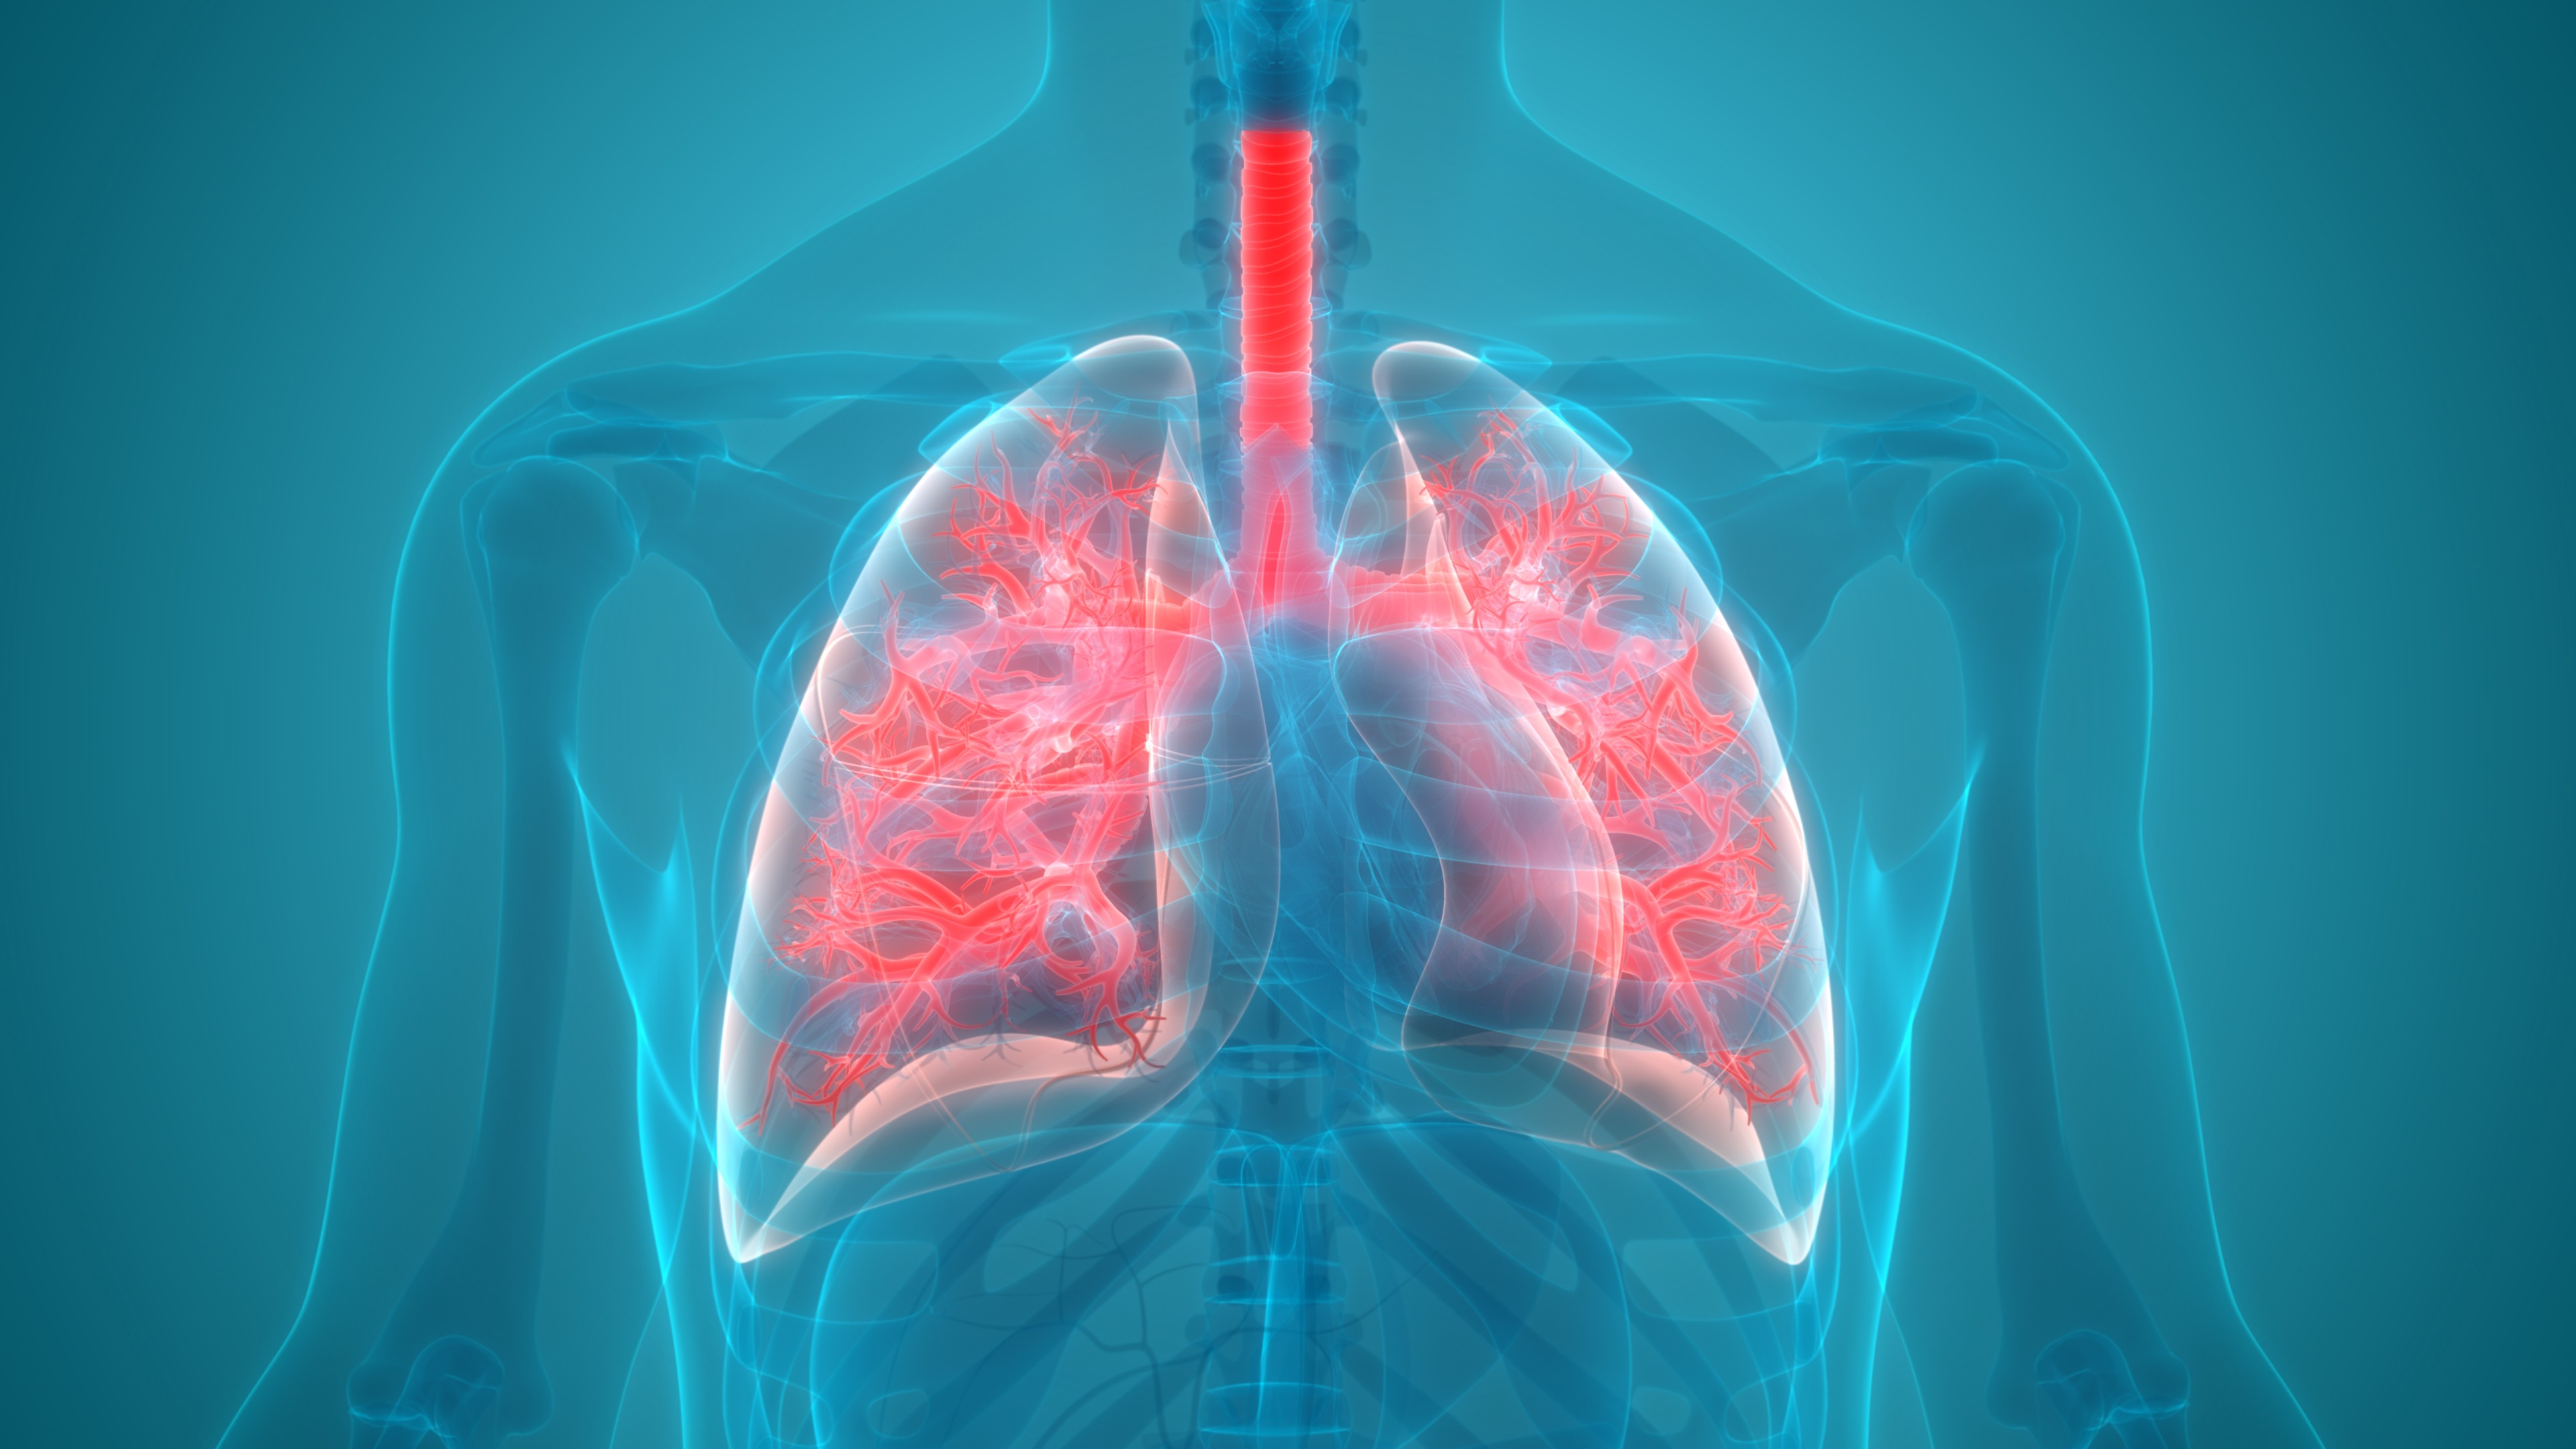

The dataset used here is chest xray dataset which is preprocessed.
You can find the **Dataset** [here.](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

The dataset consists of :


*   5216 training images of which 3815 are of Pneumonia and 1341 are normal images.
*   624 testing images of which 390 are of Pneumonia and 234 are normal.




**Libraries used :**

Numpy : Used for multidimensional arrays.

Matplotlib : Used to visualize data with graphs.

cv2 : OpenCV is used to deal with images.

Keras : It is the interface for Neural Networks and Tensorflow.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
# from keras.preprocessing.image import img_to_array

The below mentioned google.colab import drive is used to import drive to colab and drive.mount is used to mount data which is present in drive, so that we can access it. 

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

**Creating the train data generator.**

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


**Training data which is present in drive.**

In [12]:
train_images = "chest_xray/train"

Here every image is resized to (300,300)

In [13]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


**Model outputs :**

0 : Normal condition

1 : Pneumonia condition

In [14]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**Validation data generator and loading validation data**

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


**Plotting :** Images with Pneumonia from dataset.

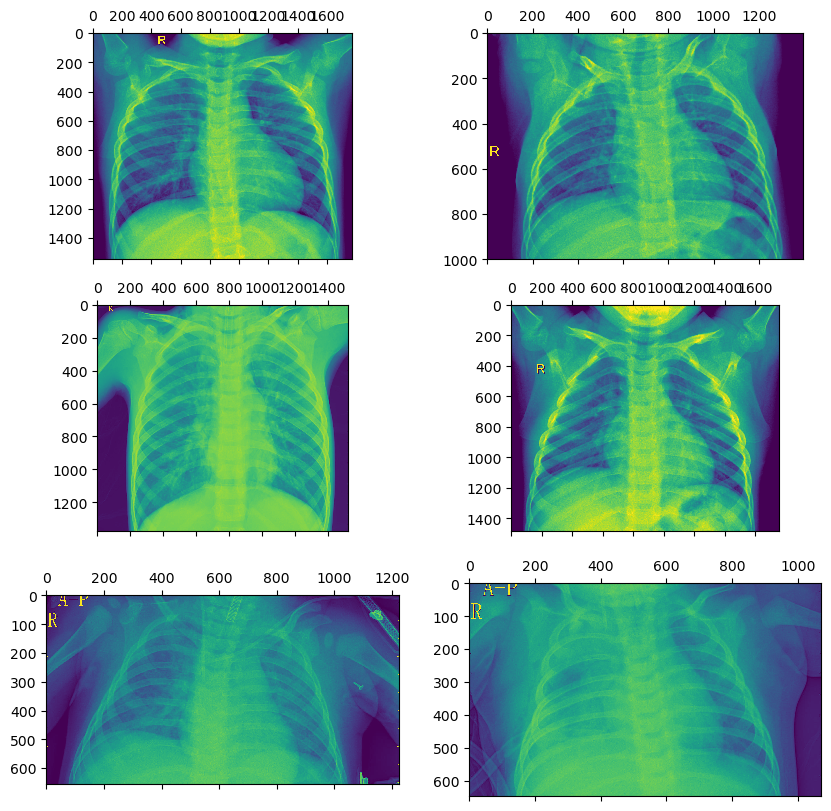

In [16]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

**Plotting :** Images without Pneumonia from dataset.

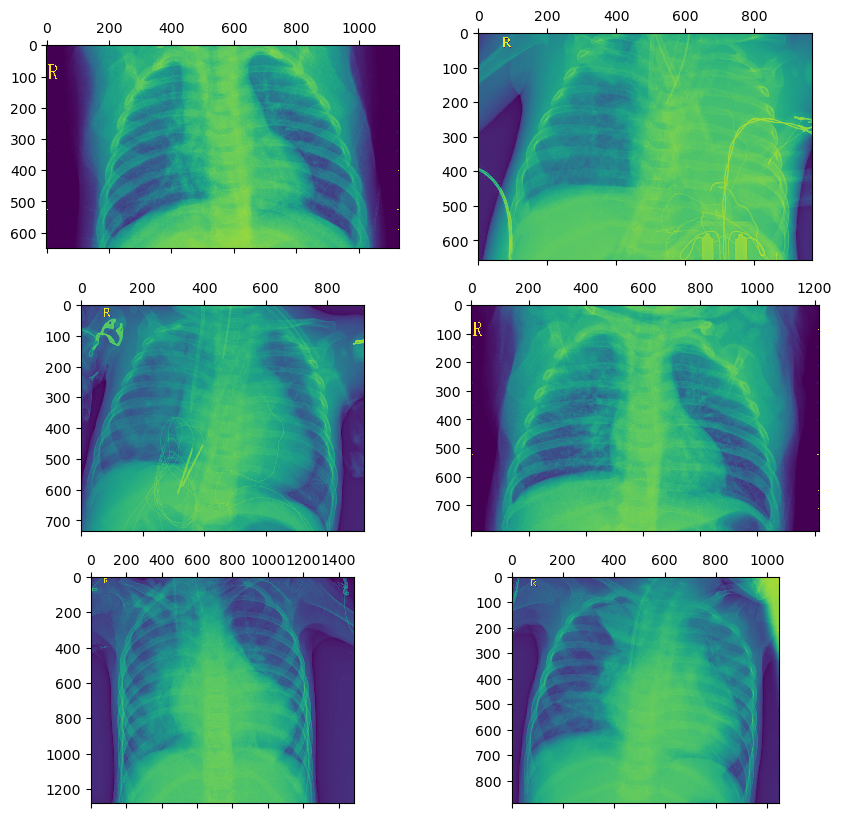

In [17]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

<h2><b> Convolutional Neural Network</b></h2>

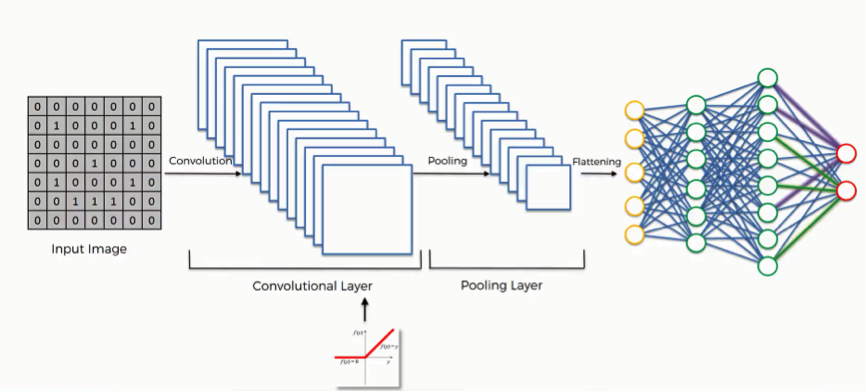

CNN consists of Convolutional layers, pooling layers.

ANN consists of hidden layers and output layers.

To develop the model I have used 5 Conv2D layers which are followed by maxpooling layers for every Conv2D layer.

Then for classification Artificial Neural Network with 2 hidden layers and one output layer which has a single neuron is used.




**Activation function :**

ReLU is used in the hidden layers and Conv2D layers.

Sigmoid is used because the output we need is of binary classification.

**Loss function :** Binary cross entropy is used.

**Optimizer :** Adam optimizer is used because it gives best result.

<h1>Neural Networks using TensorFlow</h1>

Metrics : Accuracy.

In [18]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

**Training the model for 50 epochs**

In [19]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
41/41 [==============================] - 390s 9s/step - loss: 0.5854 - accuracy: 0.7310 - val_loss: 0.8434 - val_accuracy: 0.5000
Epoch 2/50
41/41 [==============================] - 310s 8s/step - loss: 0.3250 - accuracy: 0.8566 - val_loss: 0.8053 - val_accuracy: 0.6875
Epoch 3/50
41/41 [==============================] - 325s 8s/step - loss: 0.2353 - accuracy: 0.9034 - val_loss: 0.6296 - val_accuracy: 0.7500
Epoch 4/50
41/41 [==============================] - 304s 7s/step - loss: 0.2169 - accuracy: 0.9103 - val_loss: 0.4378 - val_accuracy: 0.8125
Epoch 5/50
41/41 [==============================] - 307s 7s/step - loss: 0.1977 - accuracy: 0.9210 - val_loss: 0.6650 - val_accuracy: 0.6875
Epoch 6/50
41/41 [==============================] - 561s 14s/step - loss: 0.1791 - accuracy: 0.9289 - val_loss: 0.9849 - val_accuracy: 0.5625
Epoch 7/50
41/41 [==============================] - 310s 8s/step - loss: 0.1738 - accuracy: 0.9333 - val_loss: 1.1263 - val_accuracy: 0.5625
Epoch 8/50
4


<h2>Accuracy : 98.16%</h2>

<h2>Val_accuracy : 100%</h2>

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

**<h3>Plotting Loss Vs Num. of Epochs</h3>**

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


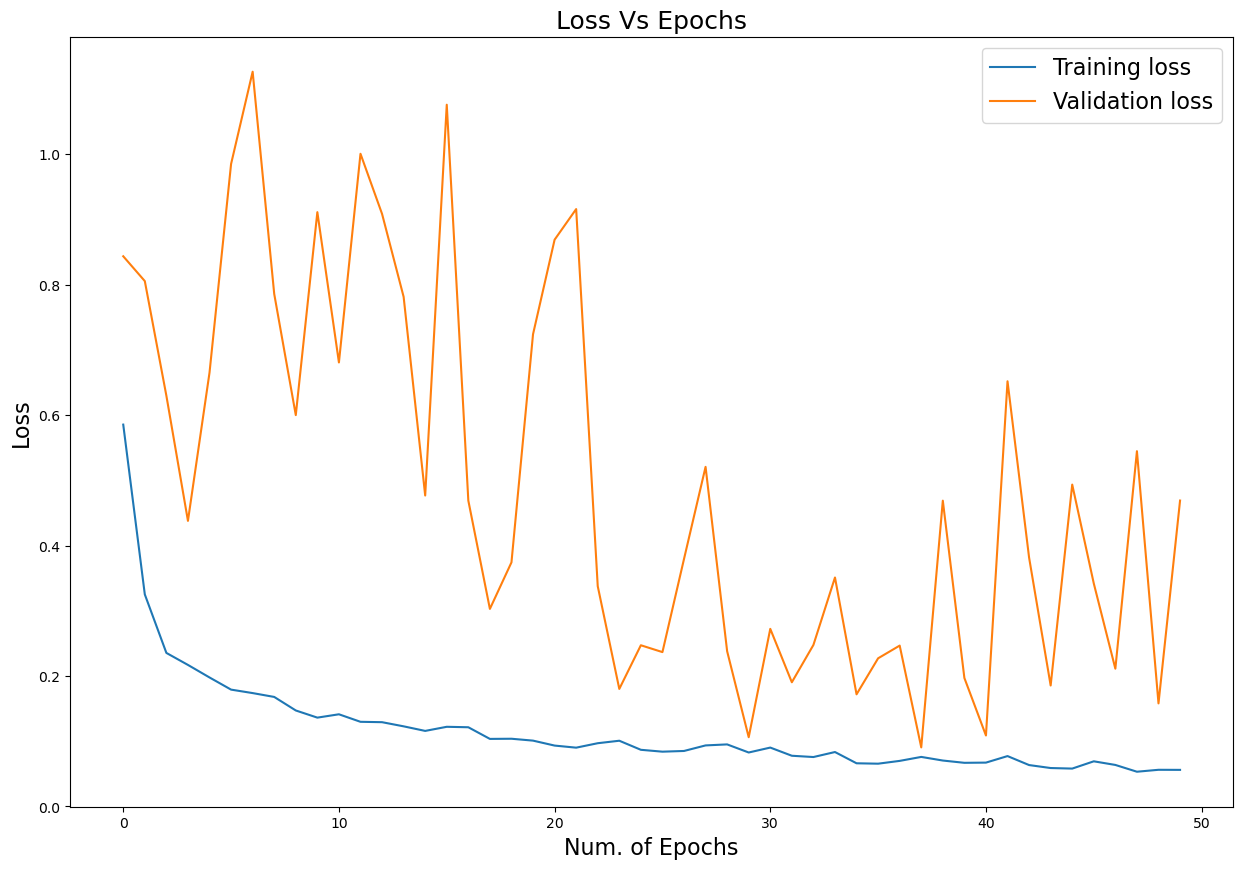

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

**<h3>Plotting Accuracy Vs Num. of Epochs</h3>**

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


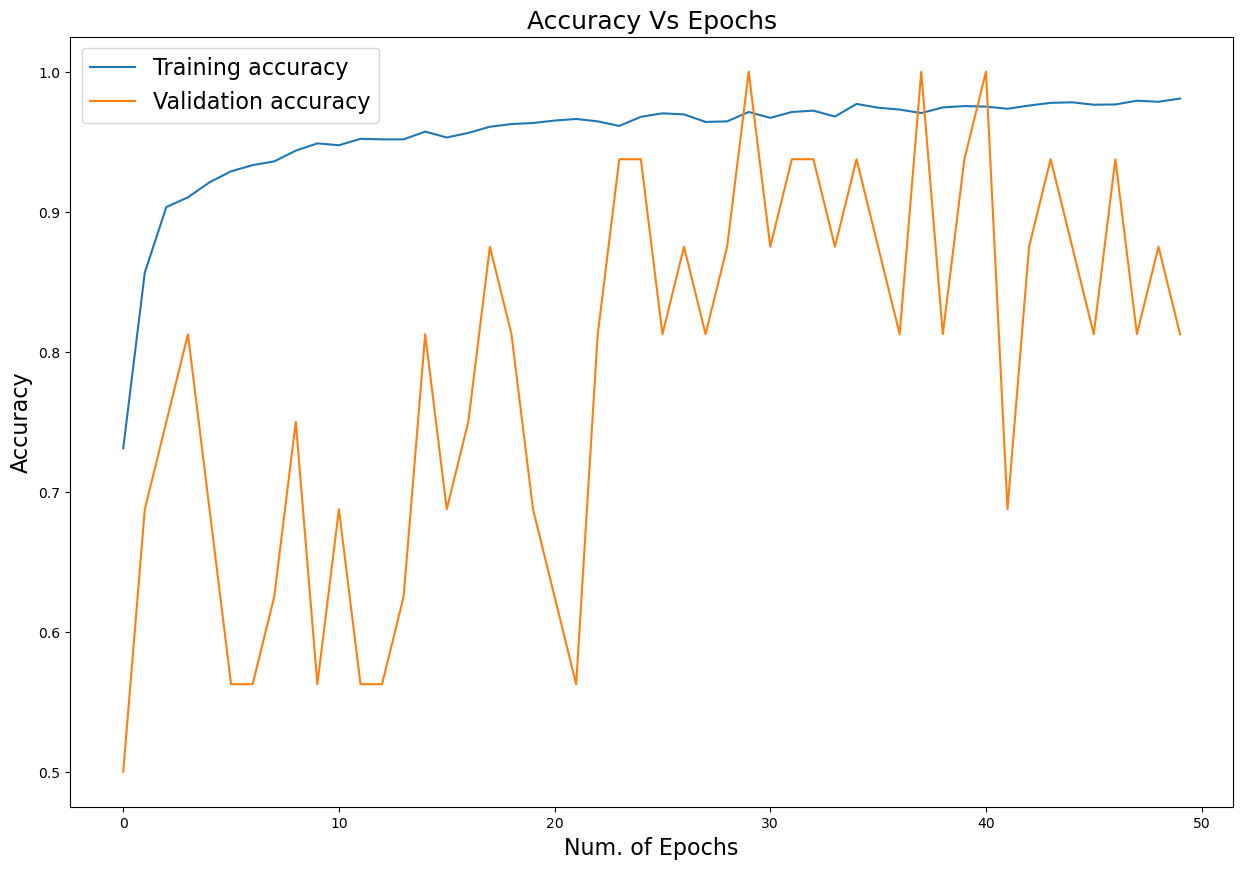

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

<h3>Saving the model</h3>

In [25]:
model.save("trained.h5")

<h3>Loading the saved model so that we can load the model which is already saved so lot of time can be saved and it can also be used for deployment.</h3>

In [3]:
from keras.models import load_model
model = load_model("trained.h5")

**Loading the test data generator from drive**

In [4]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    'chest_xray/test',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


C:\Users\91939\AppData\Local\Temp\ipykernel_17248\3210762885.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, 624)


loss : 0.2906389534473419
accuracy : 0.9198718070983887


The accuracy of test data is : <h3>92.1474%</h3>

**An image is used from drive for prediction**

In [36]:
img= cv2.imread('chest_xray/test/NORMAL/IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 [==============================] - 0s 25ms/step


array([[0.02552182]], dtype=float32)

The prediction shows value as **0.01** which is less than 0.5

so our model has to predict it as Normal which is done below.

1/1 [==============================] - 0s 39ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

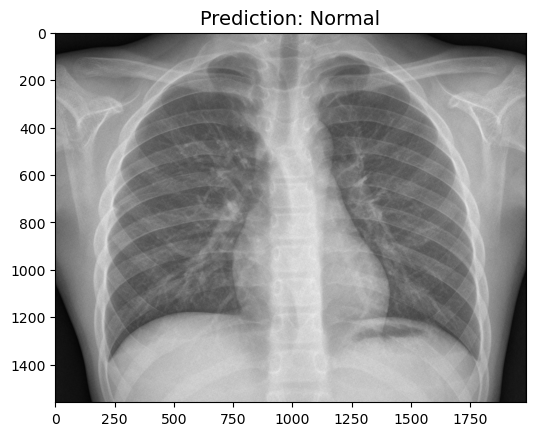

In [37]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [38]:
img= cv2.imread('chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 [==============================] - 0s 40ms/step


array([[0.9999905]], dtype=float32)

Here another image is used and the model predicted it as **0.999** which is greater than 0.5.

so it have be Pneumonia image which is predicted below.

1/1 [==============================] - 0s 43ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

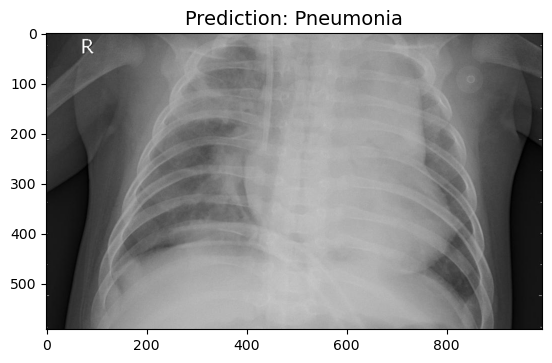

In [39]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

<h2>Conclusion :</h2>

This model can be used in Healthcare industry in the radiological department.

It can be deployed to Xray machines.

This can help radiologist to predict the chest xray images easily and accurately.
